## Домашнее задание 2 (10 баллов)

## Часть 1

В первой части домашнего задания вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [18]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [19]:
def result_mark(weights: np.array, marks: np.array) -> int:
    result1=np.round(weights@marks)
    return result1

In [20]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])
assert result_mark(weights, marks) == 8

In [21]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [22]:
def change_array(array: np.array, number: int) -> np.array:
    array[0::3]=number
    return array

In [23]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [24]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [25]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    result3=np.asarray(*np.where(np.absolute(array1-array2)<=precision))
    return result3

In [26]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)
assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [27]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [28]:
def block_matrix(block: np.array) -> np.array:
    result4=np.block([[block, block], [block, block]])
    return result4  

In [29]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [30]:
def diag_prod(matrix: np.array) -> int:
    a=np.diag(matrix)
    result5=np.prod(a[a!=0])
    return result5

In [31]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [32]:
def normalize(matrix: np.array) -> np.array:
    mean6=np.mean(matrix,axis = 0)
    std6=np.std(matrix,axis=0)
    result6= (matrix-mean6)/std6
    return result6

In [33]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [34]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

In [35]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### Задание 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [36]:
def antiderivative(coefs: np.array) -> np.array:
    result7=np.polyint(coefs)
    return result7

In [37]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [38]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [39]:
def make_symmetric(matrix: np.array) -> np.array:
    result8=np.triu(matrix) + np.tril(matrix.T, -1)
    return result8

In [40]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [41]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [42]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    result9= np.zeros((m, b-a+1))
    result9 += np.arange(a,b+1)
    return result9

In [43]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [44]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [45]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    result10 = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
    return result10 

In [46]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [47]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

* Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

* Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test, обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

* Посмотрите на матрицу корреляций факторов и целевой переменной. Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

* Если есть факторы, слабо коррелирующие с таргетом, удалите их.

* Попытайтесь сконструировать новые признаки.

* Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

**Ваша цель**: добиться наилучшего качества по метрике $r^2$ на кросс-валидации.

In [96]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%pylab inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


Загружаем данные

In [97]:
df=pd.read_csv("affairs.csv")
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


Посмотрим на первоначальное качество линейной регрессии при кросс-валидации.

In [98]:
X_full=df[['rate_marriage','age','yrs_married','children','religious','educ','occupation','occupation_husb']]
y_full=df['affairs']

In [99]:
X_full.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0


In [100]:
from sklearn.model_selection import cross_val_score

model=LinearRegression()
print(cross_val_score(model,X_full,y_full,cv=5,scoring='r2'))
print(cross_val_score(model,X_full,y_full,cv=5,scoring='r2').mean())

[-0.22867743  0.0034017   0.          0.          0.        ]
-0.04505514528047823


Качество модели очень низкое. Коэффициент детерминации очень сильно различается для разных частей датасета. Попробуем перемешивать датасет с помощью ShuffleSplit.

In [101]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

model=LinearRegression()
print(cross_val_score(model,X_full,y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full,y_full,cv=cv,scoring='r2').mean())

[0.05845978 0.06712723 0.06688987 0.04759744 0.05964932]
0.05994472763553367


Теперь поработаем с параметрами. Составим таблицы корреляции признаков и целевой переменной.

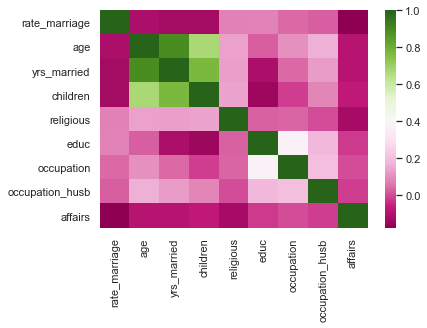

In [102]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [103]:
corr

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [104]:
df[df.columns[0:]].corr()['affairs'][:-1]

rate_marriage     -0.178068
age               -0.089964
yrs_married       -0.087737
children          -0.070278
religious         -0.125933
educ              -0.017740
occupation         0.004469
occupation_husb   -0.015614
Name: affairs, dtype: float64

Рассмотрим признаки, которые наименее коррелируют с целевой переменной, ппробуем их удалить.
При удалении параметра "educ", который мало коррелирует с целевой переменной, модель практически не изменилась

In [117]:

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation','occupation_husb']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation','occupation_husb']],y_full,cv=cv,scoring='r2').mean())

[0.0579973  0.06799812 0.06623508 0.04747108 0.06010708]
0.05996173228500092


При удалении параметра "occupation", который мало коррелирует с целевой переменной, модель стала чуть хуже

In [118]:

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation_husb']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation_husb']],y_full,cv=cv,scoring='r2').mean())

[0.0578094  0.06702696 0.06592831 0.04690307 0.0599084 ]
0.05951522980362349


При удалении параметра "occupation_husb", который мало коррелирует с целевой переменной модель стала чуть лучше. Оставим этот набор признаков пока.

In [124]:


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.059272   0.06799786 0.06624353 0.04771239 0.06034396]
0.060313947615986116


Поработаем теперь с наиболее коррелируемыми признаками.

Попробуем добавить новый признак 'rate_marriage_NEW', который будет квадратом 'rate_marriage', и построить модель заново

In [134]:
X_full['rate_marriage_NEW'] = X_full['rate_marriage'] ** 2

In [135]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage_NEW','age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage_NEW','age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.05803209 0.06878092 0.06491195 0.0477939  0.06144836]
0.06019344099411346


лучше не стало

In [138]:
X_full['religious_NEW'] = X_full['religious'] ** 2

In [139]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious_NEW','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious_NEW','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.05848254 0.06624296 0.06509136 0.04624883 0.05926343]
0.05906582520537518


стало хуже

Попробуем посмотреть графики зависимости, по ним тоже ничего не видно. 

rate_marriage


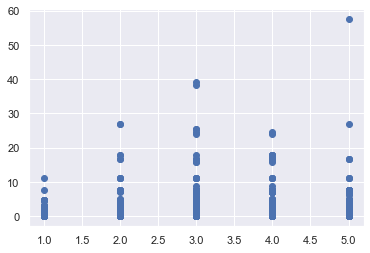

age


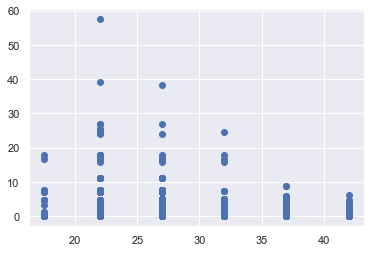

yrs_married


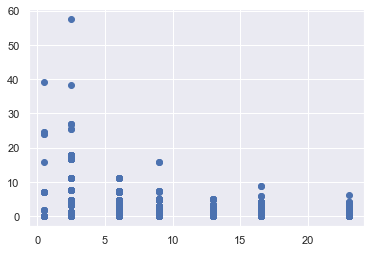

children


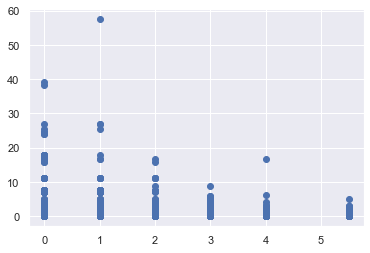

religious


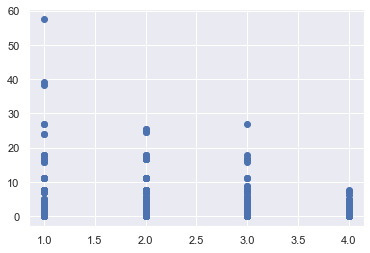

educ


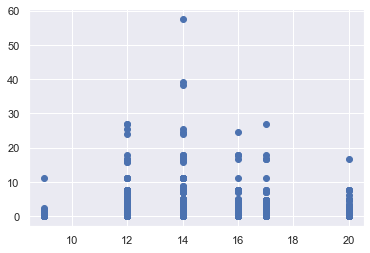

occupation


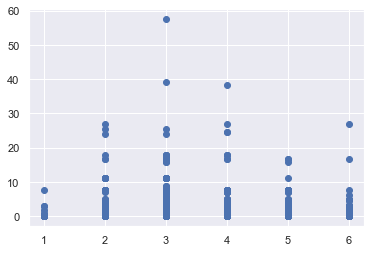

occupation_husb


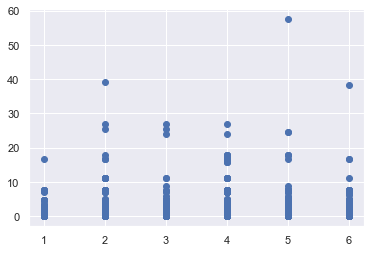

In [131]:
for c in df.columns:
    if c != 'affairs':
        print(c)
        scatter(df[c], df['affairs'])
        show()

Признак 'rate_marriage' сильно коррелирует с признаками 'age','yrs_married','children'. При их удалении по одному или всех сразу модель становится хуже. Возможно потому,что они коррелируют и с целевой переменной.

In [150]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','religious','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','religious','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.05058457 0.05650786 0.05586128 0.03704475 0.04954768]
0.049909228136521475


Попробуем нормировать данные

In [151]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[[,'age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.02092648 0.02658499 0.02041691 0.01967811 0.02541515]
0.022604330025744156


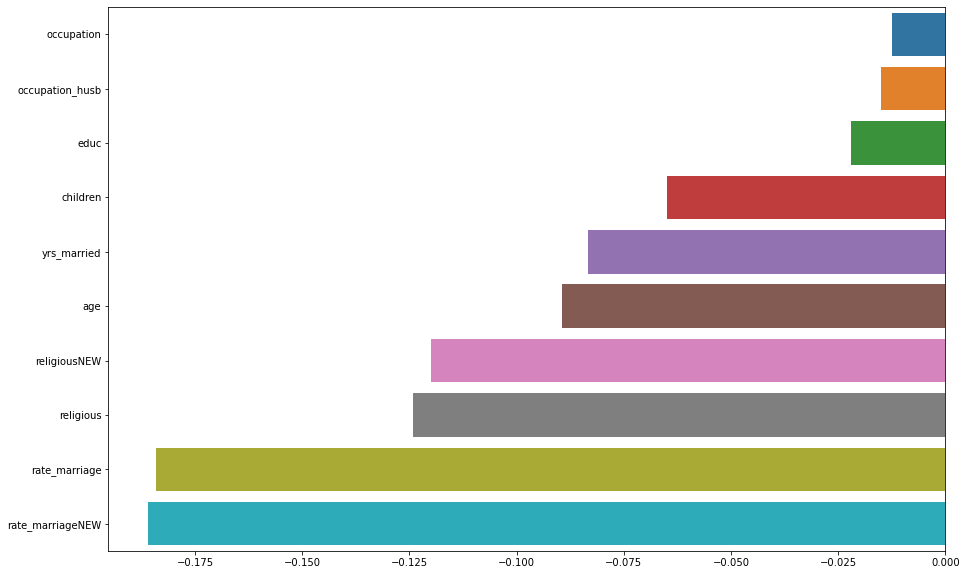

In [45]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [85]:
from sklearn.model_selection import cross_val_score
model=Ridge()#LinearRegression()
print(cross_val_score(model,X_full,y_full,cv=4,scoring='r2'))
print(cross_val_score(model,X_full,y_full,cv=4,scoring='r2').mean())

[-0.27371521  0.05129052  0.          0.        ]
-0.05560617227222814


In [84]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_full, y_full, cv=10, scoring='r2')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.1673
	-0.1471
	-0.1410
	-0.0300
	0.0000
	0.0000
	0.0000
	0.0000
	0.0000
	0.0000
Mean CV RMSE = 0.0485


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring=rmse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Нарисуем матрицу корреляций признаков.

In [15]:
#X_full=df[['rate_marriage','age','yrs_married','children','religious','educ','occupation','occupation_husb']]
#y_full=df['affairs']

In [37]:
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','religious','age','yrs_married','children']],y_full,cv=10,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','religious','age','yrs_married','children']],y_full,cv=10,scoring='r2').mean())

[-0.16796129 -0.14803301 -0.14116819 -0.0255503   0.          0.
  0.          0.          0.          0.        ]
-0.048271278912348836


In [38]:
X_full['rate_marriageNEW'] = X_full['rate_marriage'] ** 2
X_full['religiousNEW'] = X_full['religious'] ** 2

In [ ]:
# X_full.head(10)

In [40]:
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriageNEW','religiousNEW','age','yrs_married','children']],y_full,cv=10,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriageNEW','religiousNEW','age','yrs_married','children']],y_full,cv=10,scoring='r2').mean())

[-0.1705856  -0.14757148 -0.14312177 -0.02685557  0.          0.
  0.          0.          0.          0.        ]
-0.048813442769393256


# По лекциям Git

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [49]:
data=pd.read_csv("affairs.csv")
data.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [50]:
data.shape

(6366, 9)

In [51]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

y = data["affairs"]
X = data.drop(columns=["affairs"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

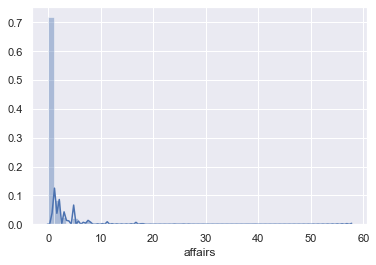

In [55]:
sns.distplot(y_train)

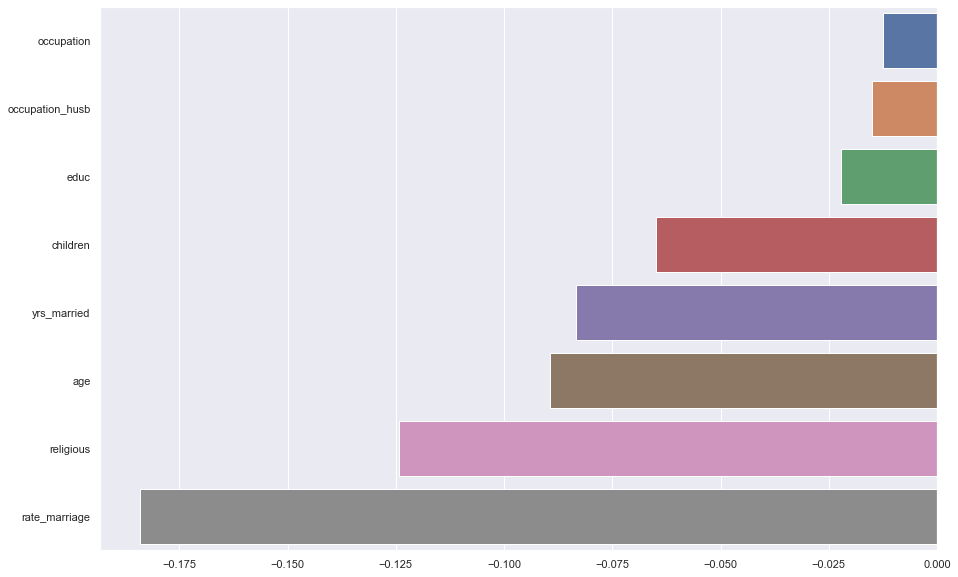

In [56]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

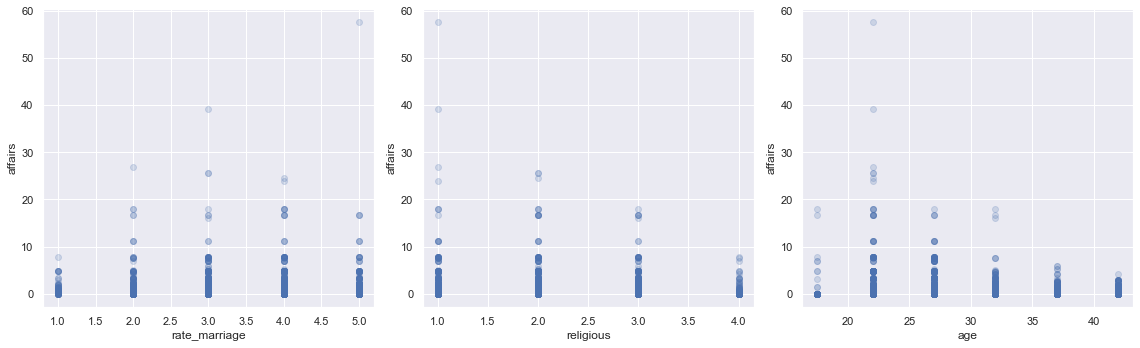

In [57]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["rate_marriage", "religious", "age"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("affairs")
plt.tight_layout()

In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 2.1449
Train RMSE = 2.1415


In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = -cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="r2")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 -0.0525
	-0.0319
	-0.0747
	-0.0437
	-0.0577
	-0.0280
	-0.0873
	-0.0151
	-0.0615
	-0.1210
Mean CV MSE = -0.0573


In [64]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with best constant = 2.2021
Train RMSE with best constant = 2.2037


In [62]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

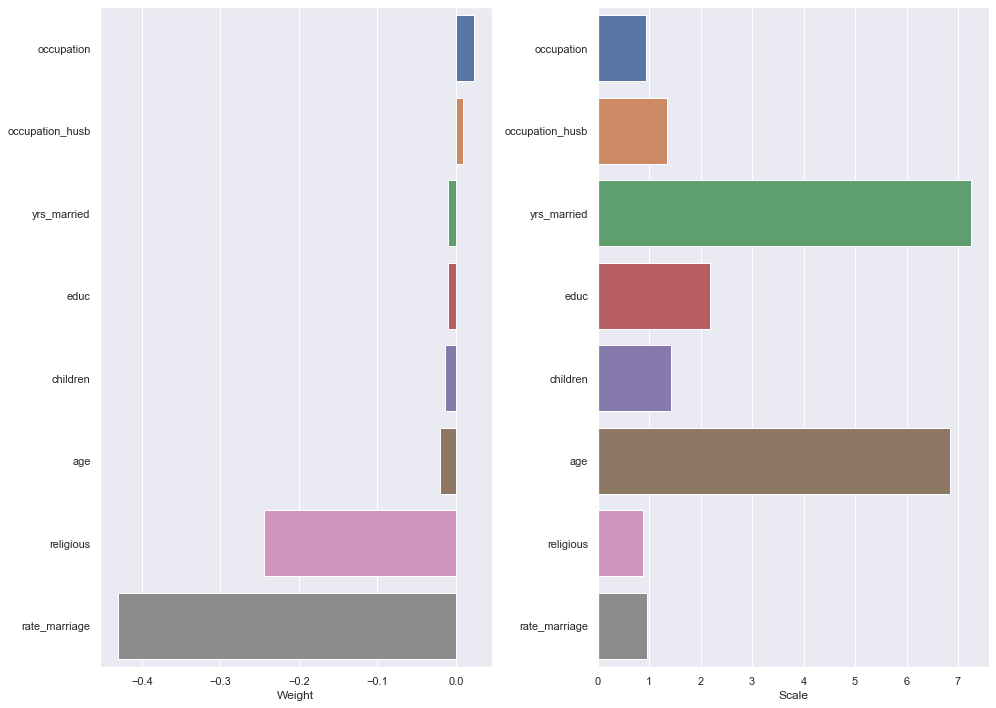

In [63]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 2.1449
Train RMSE = 2.1415


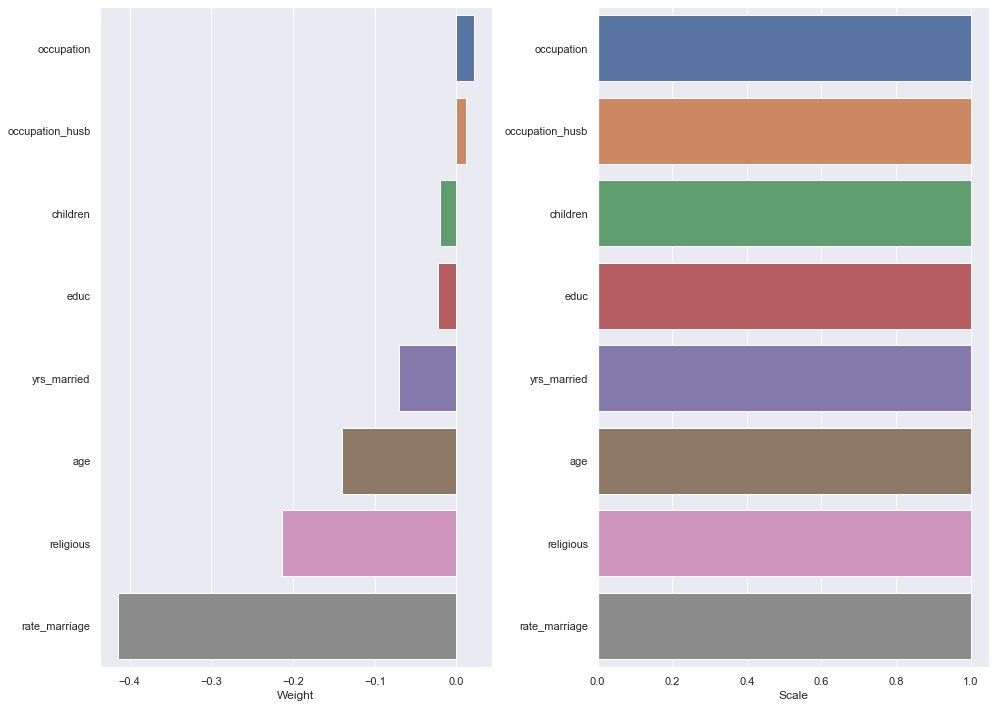

In [66]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

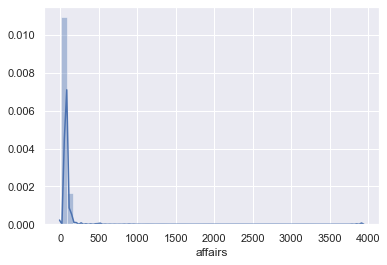

In [67]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

In [68]:
mask = (error < np.quantile(error, 0.95))

In [74]:
model.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 2.1896
